SyntaxError: invalid non-printable character U+200B (1634882676.py, line 31)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int32(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter
    
class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex
    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)
    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))        

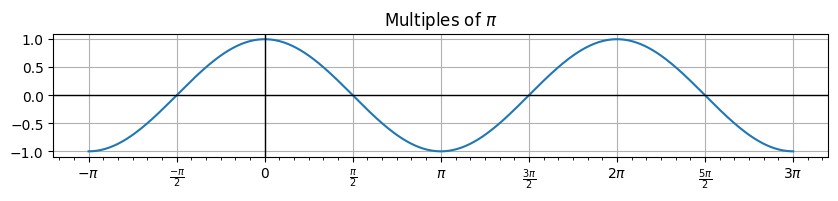

In [16]:
x = np.linspace(-np.pi, 3*np.pi,500)
plt.figure(figsize=(10,6))

plt.plot(x, np.cos(x))
plt.title(r'Multiples of $\pi$')
ax = plt.gca()
ax.grid(True)
ax.set_aspect(1.0)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.show()

In [84]:
def trig_plot(f, xmin=-np.pi, xmax=3*np.pi, ymin=-1, ymax=1, title="", show_minor_x = False):
    x = np.linspace(xmin, xmax,500)
    vf = np.vectorize(f)
    plt.figure(figsize=(10,6))
    plt.ylim(top=ymax, bottom=ymin)
    plt.plot(x, vf(x))
    plt.title(title)
    ax = plt.gca()
    ax.grid(True)
    if show_minor_x:
        plt.grid(axis='x', which='both', visible=True)
    else:
        plt.grid(axis='x', which='major', visible=True)
    ax.set_aspect(1.0)
    ax.axhline(0, color='black', lw=2)
    ax.axvline(0, color='black', lw=2)
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    plt.savefig(title+".png",dpi=300,pad_inches=0, bbox_inches='tight' )

In [78]:
from math import sin, cos, tan
sec = lambda x:1/cos(x)
csc = lambda x:1/sin(x)
cot = lambda x:1/tan(x)

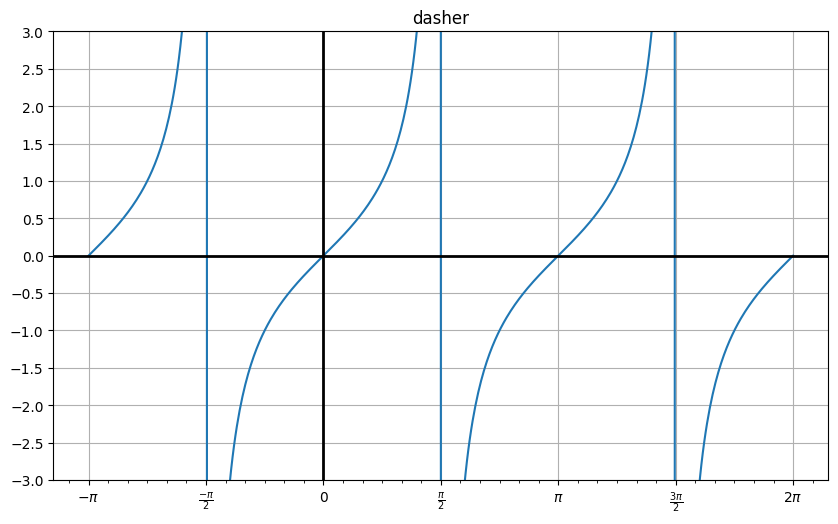

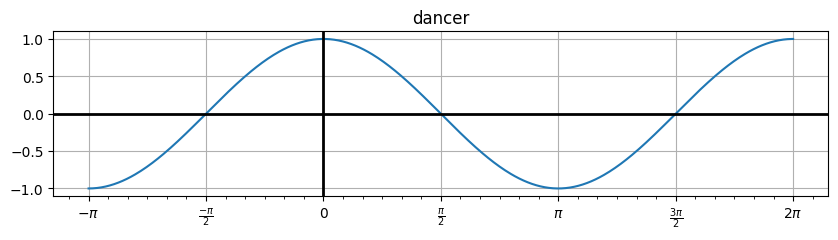

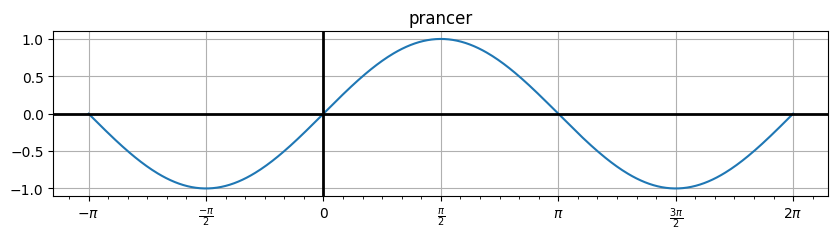

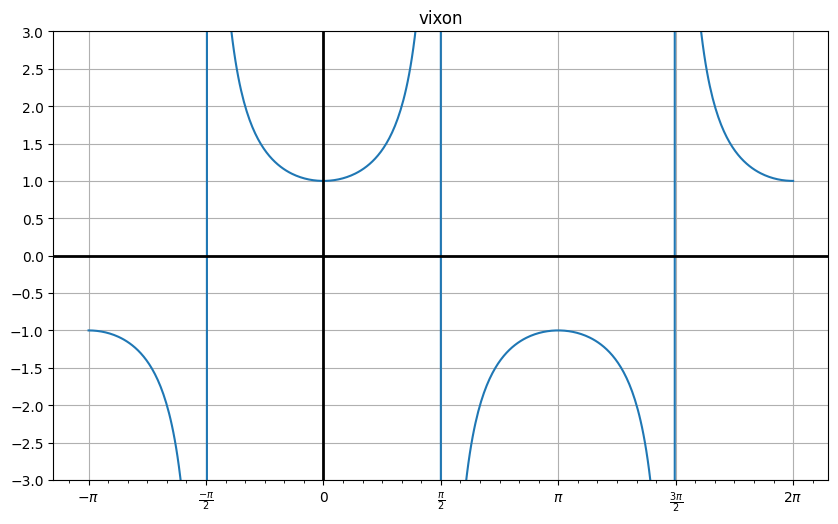

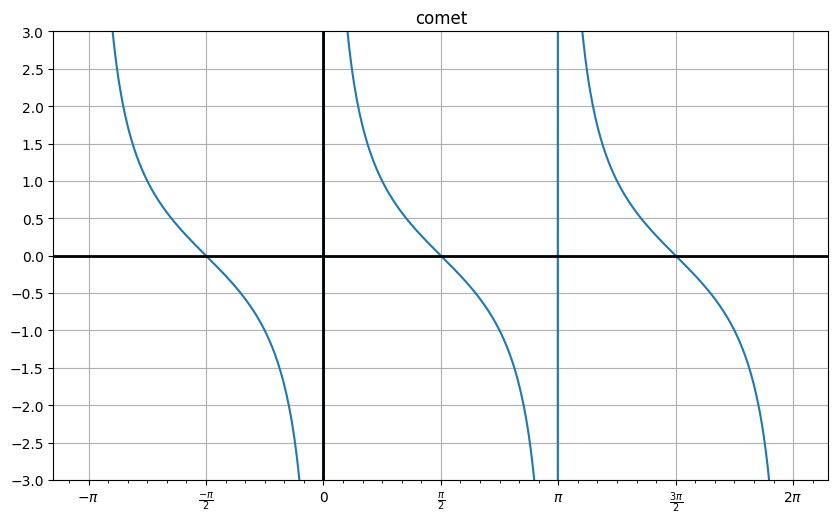

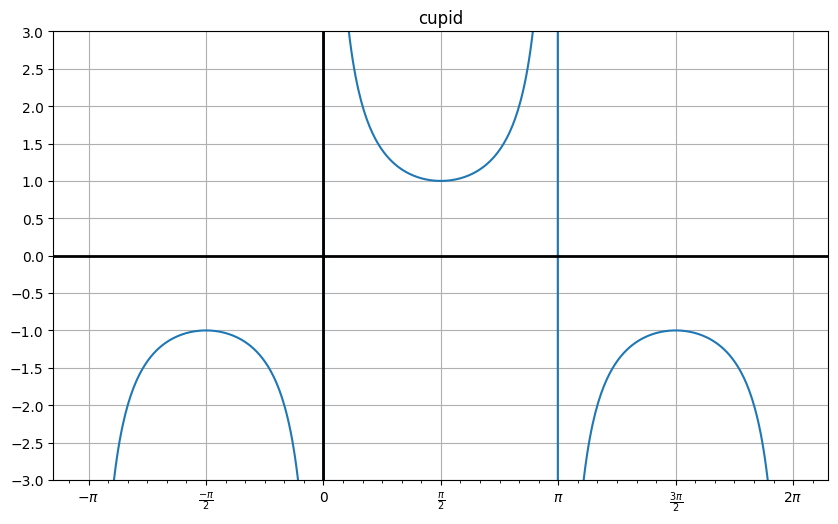

In [66]:
trig_plot(tan,ymin=-3, ymax=3, xmin=-np.pi, xmax=2*np.pi, title="dasher")
trig_plot(cos,ymin=-1.1, ymax=1.1, xmin=-np.pi, xmax=2*np.pi, title="dancer")
trig_plot(sin,ymin=-1.1, ymax=1.1,  xmin=-np.pi, xmax=2*np.pi, title="prancer")
trig_plot(sec,ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="vixon")
trig_plot(cot,ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="comet")
trig_plot(csc,ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="cupid")

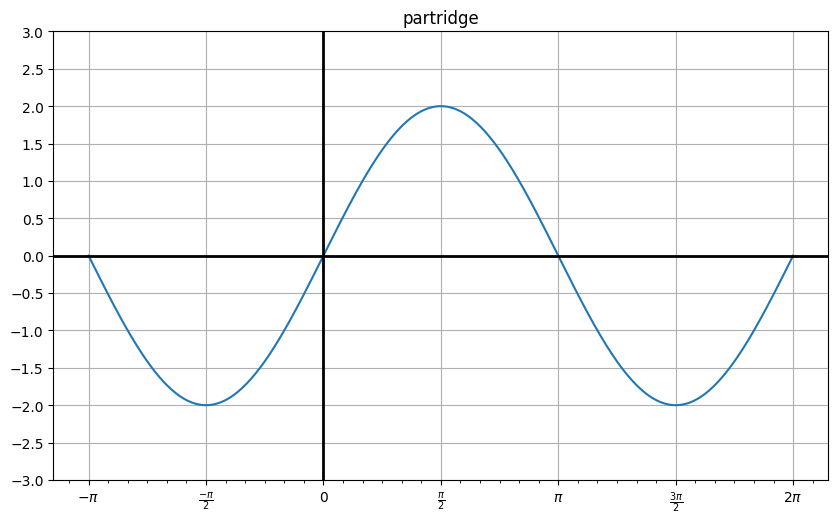

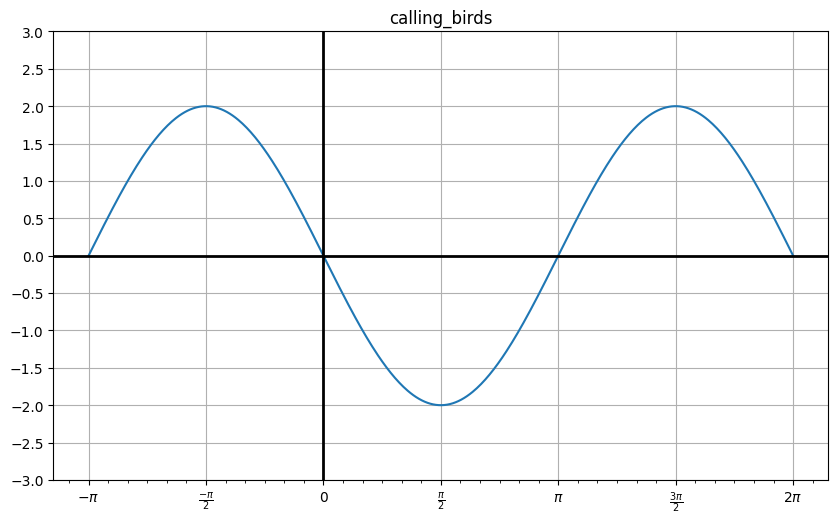

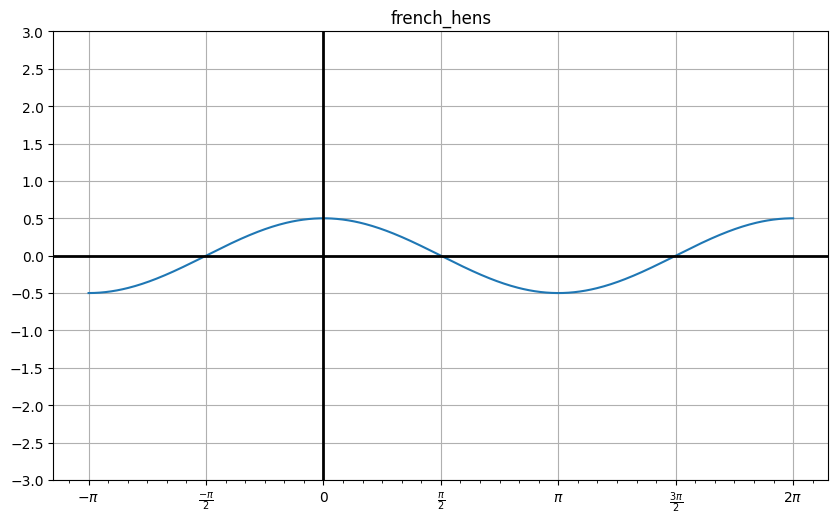

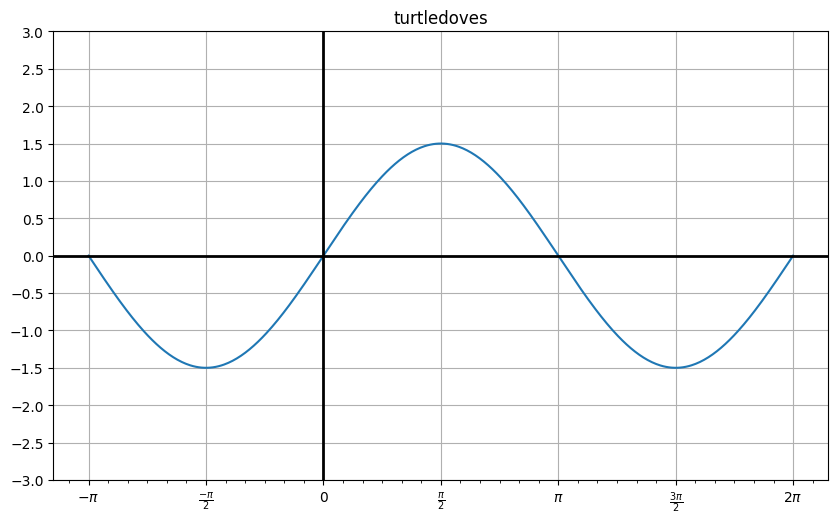

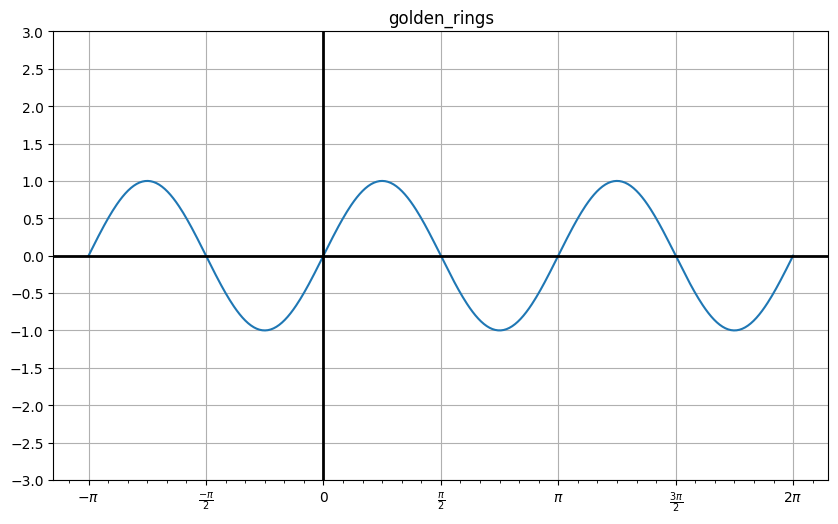

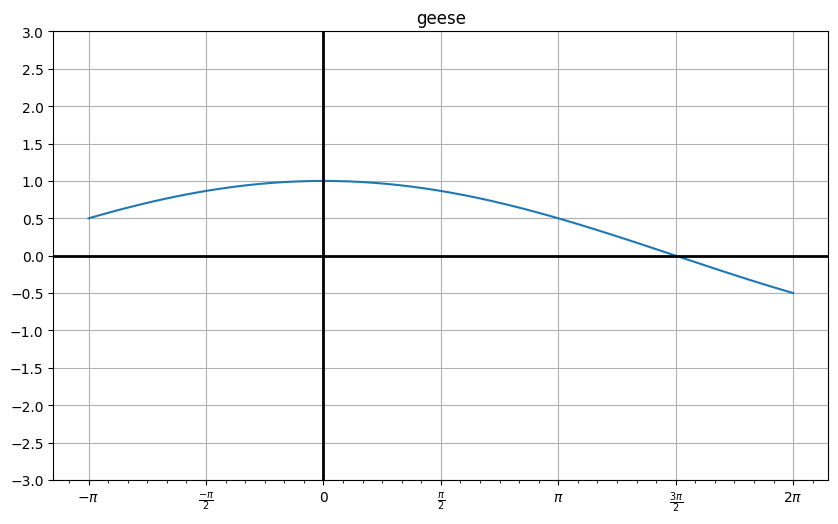

In [68]:
trig_plot(lambda x:2*sin(x),ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="partridge")
trig_plot(lambda x:-2*sin(x),ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="calling_birds")
trig_plot(lambda x:0.5*cos(x),ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="french_hens")
trig_plot(lambda x:1.5*sin(x),ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="turtledoves")
trig_plot(lambda x:sin(2*x),ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="golden_rings")
trig_plot(lambda x:cos(x/3),ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="geese")

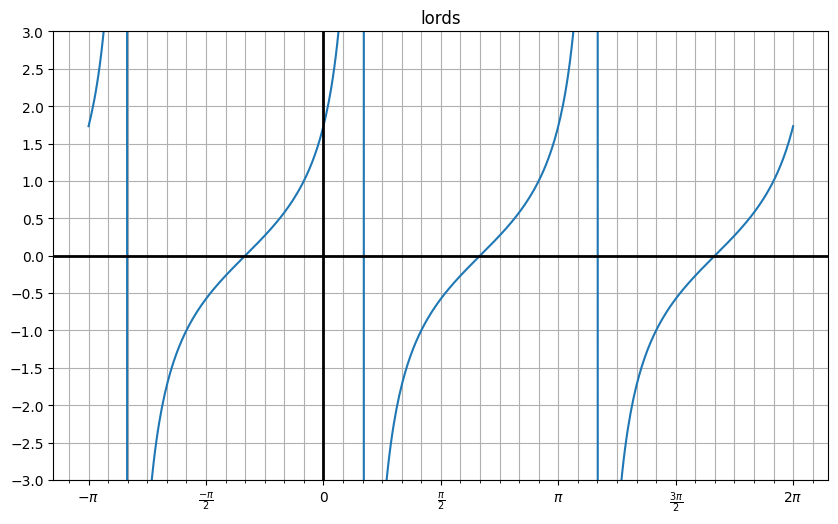

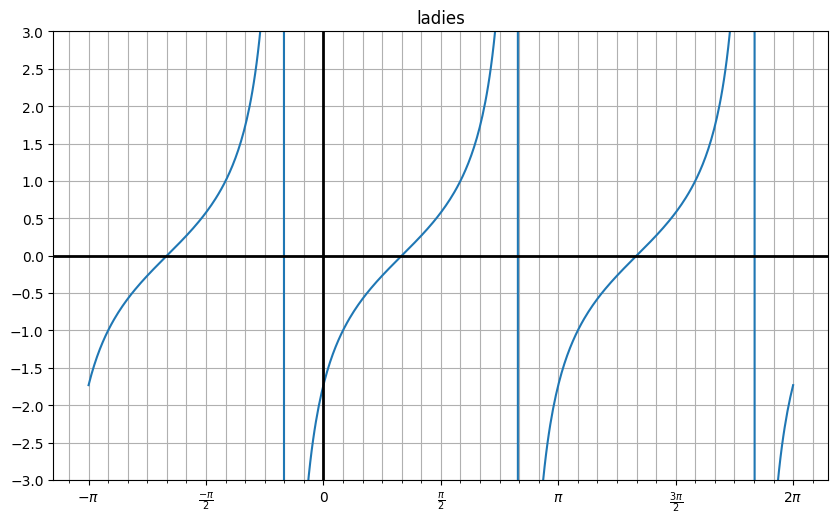

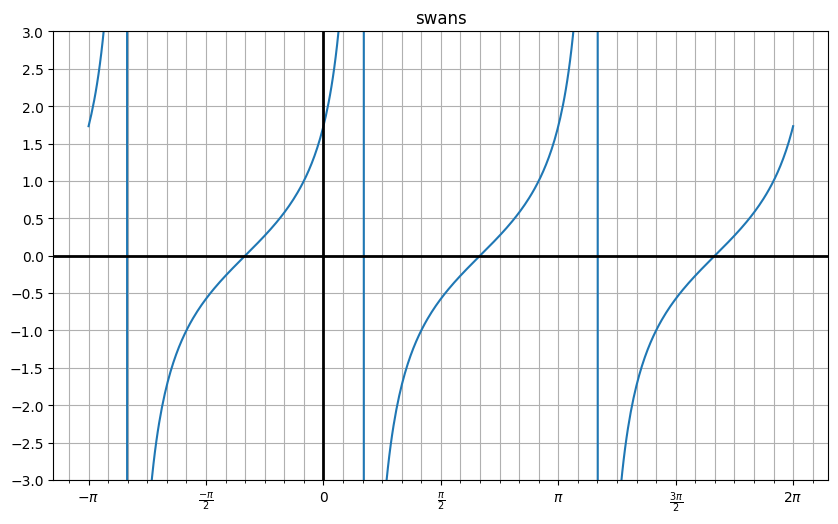

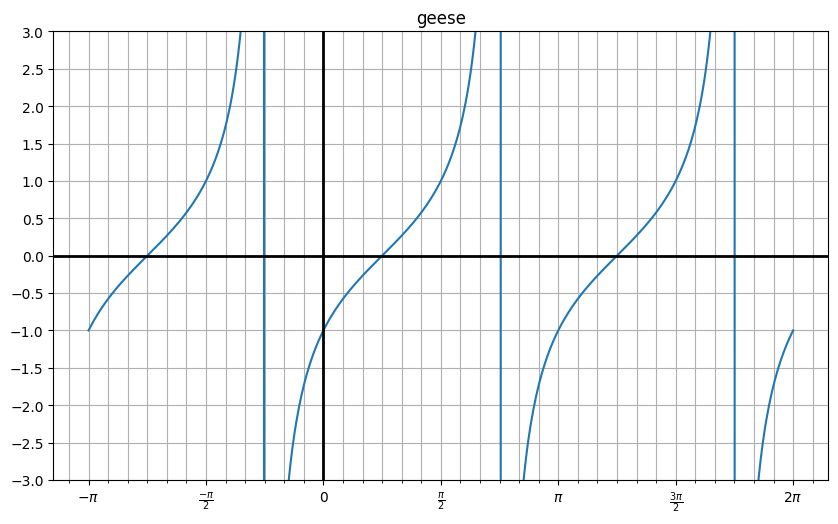

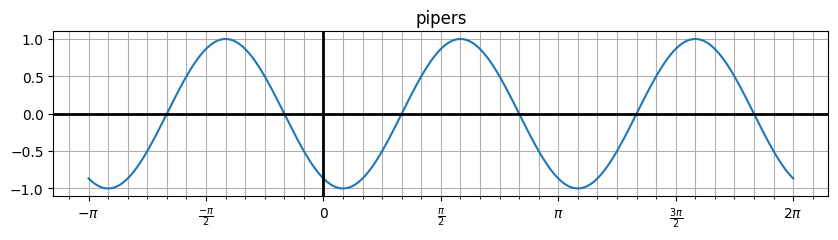

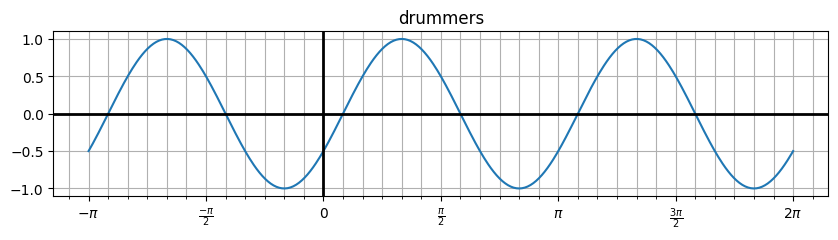

In [89]:
pi = np.pi
trig_plot(lambda x:tan(x+pi/3),ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="lords", show_minor_x = True)
trig_plot(lambda x:tan(x-pi/3),ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="ladies", show_minor_x = True)
trig_plot(lambda x:tan(x-2*pi/3),ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="swans", show_minor_x = True)
trig_plot(lambda x:tan(x+7*pi/4),ymin=-3, ymax=3,  xmin=-np.pi, xmax=2*np.pi, title="geese", show_minor_x = True)
trig_plot(lambda x:sin(2*(x-pi/3)),ymin=-1.1, ymax=1.1,  xmin=-np.pi, xmax=2*np.pi, title="pipers", show_minor_x = True)
trig_plot(lambda x:cos(2*(x-pi/3)),ymin=-1.1, ymax=1.1,  xmin=-np.pi, xmax=2*np.pi, title="drummers", show_minor_x = True)
